In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_file = pd.read_table('data.txt')
data = data_file.to_string().split('\n')[1:]
data = [i.split()[:-1] for i in data]

In [4]:
data = np.array(data).astype(float)
data = data[:,[2,5]]

[[ 3.01  1.1 ]
 [-0.39  1.36]
 [-1.82  1.54]
 [-0.34  1.29]
 [-0.58  1.24]
 [-2.04  1.62]
 [-0.57  1.14]
 [-0.44  1.05]
 [ 1.18  1.37]
 [-0.45  1.36]
 [-2.29  1.56]
 [-0.37  1.27]
 [-2.11  1.4 ]
 [-0.52  1.27]
 [-0.37  1.31]
 [-0.39  1.23]
 [-0.16  1.16]
 [ 3.96  0.89]
 [ 1.11  1.18]
 [-0.65  1.69]
 [-0.5   1.49]
 [ 1.66  0.29]
 [-0.64  1.29]
 [-0.49  1.35]
 [-0.8   1.15]
 [-0.36  1.21]
 [-0.07  1.41]
 [-0.79  1.33]
 [-0.32  1.43]
 [-0.16  1.28]
 [-0.32  1.3 ]
 [-0.53  1.14]
 [-0.25  1.23]
 [-0.47  1.38]
 [-0.17  1.34]
 [-2.33  1.21]
 [ 1.09  1.32]
 [-0.03  1.35]
 [ 4.13  0.47]
 [ 4.13  0.47]
 [-0.07  1.12]
 [-0.45  1.2 ]
 [-0.21  1.33]
 [ 4.1   0.72]
 [-0.14  1.19]
 [ 1.    1.35]
 [ 0.69  1.18]
 [ 8.67  0.71]
 [ 4.23  0.79]
 [ 0.98  1.23]
 [ 5.2   0.51]
 [ 1.26  1.28]
 [ 0.08  1.19]
 [ 0.37  1.28]
 [-0.22  1.29]
 [-0.31  1.29]
 [-5.85  1.12]
 [ 0.24  1.29]
 [-0.46  1.17]
 [-0.46  1.19]
 [ 1.05  1.11]
 [ 1.77  1.32]
 [ 3.72  0.88]
 [ 4.27  0.78]
 [ 3.72  0.9 ]
 [ 2.99  1.12]
 [ 3.52  0

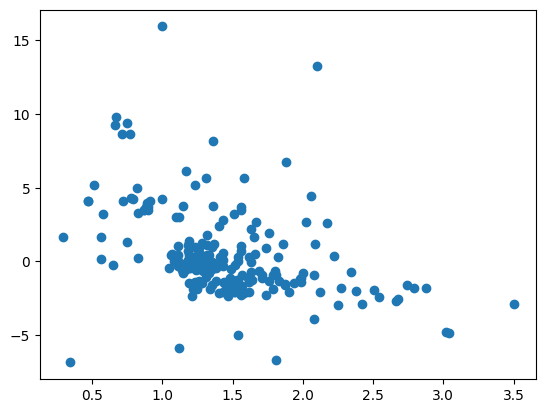

In [5]:
print(data , data.shape)
plt.scatter(data[:,[1]],data[:,[0]])

In [6]:
def gaussian_kernel(x : np.array , value, y , h):
    t = np.square((x-value)/h)/2
    return np.dot(np.exp(-t),y)/np.sqrt(2*np.pi)

def epanechnikov_kernel(x : np.array , value, y , h):
    return np.dot(np.maximum(1e-6,1-np.square((x-value)/h)),y)


class Kernel_Estimator:
    def __init__(self , data , kernel , kernel_type):
        self.x = data[:,[1]].reshape(-1)
        self.y = data[:,[0]].reshape(-1)
        self.m = np.min(self.x)
        self.M = np.max(self.x)
        self.kernel = kernel
        self.type = kernel_type

    def estimate(self , h):

        x_range = np.linspace(0.0,4.0,200,dtype=float)
        y_range = np.array([self.kernel(self.x,_x,self.y,h)/(self.kernel(self.x,_x,np.ones(self.x.shape[0]),h)) for _x in x_range])

        return x_range,y_range
    
    def prediction(self, val , h):
        return np.array([self.kernel(self.x,_x,self.y,h)/(self.kernel(self.x,_x,np.ones(self.x.shape[0]),h)) for _x in val])

    def loocv(self,h):
        error = 0
        for i in range(self.x.shape[0]):
            x_train = np.hstack((self.x[:i] , self.x[i+1:]))
            y_train = np.hstack((self.y[:i] , self.y[i+1:]))
            x_test = [self.x[i]]
            y_test = [self.y[i]]

            
            y_pred = np.array([self.kernel(x_train,_x,y_train,h)/(self.kernel(x_train,_x,np.ones(x_train.shape[0]),h)) for _x in x_test])
            
            error += np.sum(np.square(y_pred - y_test))
        
        return error/self.x.shape[0]

    def estimate_range(self , h : np.array):
        error = np.array([self.loocv(_h) for _h in h])
        return error

## Gaussian Kernel

Expected risk is minimized at h 0.12999999999999998


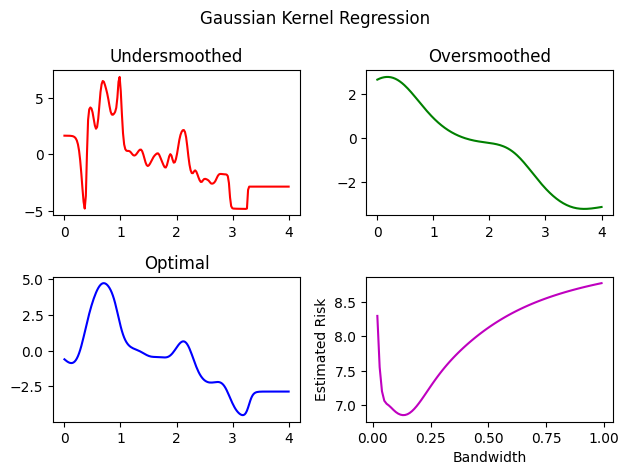

In [12]:
fig, axes = plt.subplots(2, 2)
h = np.arange(0.02,1,0.01)

obj = Kernel_Estimator(data,gaussian_kernel,"gaussian_kernel")
fig.suptitle("Gaussian Kernel Regression")

axes[0,0].plot(obj.estimate(0.04)[0],obj.estimate(0.04)[1],'r')
axes[0,0].set_title('Undersmoothed')

axes[0,1].plot(obj.estimate(0.4)[0],obj.estimate(0.4)[1],'g')
axes[0,1].set_title('Oversmoothed')



axes[1,1].plot(h,obj.estimate_range(h),'m')
axes[1,1].set_xlabel("Bandwidth")
axes[1,1].set_ylabel("Estimated Risk")




print(f'Expected risk is minimized at h',h[np.argmin(obj.estimate_range(h))])


axes[1,0].plot(obj.estimate(h[np.argmin(obj.estimate_range(h))])[0],obj.estimate(h[np.argmin(obj.estimate_range(h))])[1],'b')
axes[1,0].set_title('Optimal')


plt.tight_layout()
plt.savefig("gaussian_kernel_regression.png")
plt.show()

## Epanechnikov Kernel

Expected risk is minimized at h 0.32727272727272727


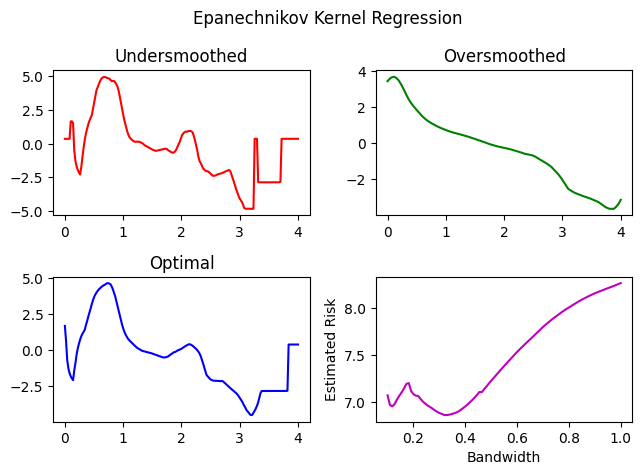

In [13]:
obj = Kernel_Estimator(data,epanechnikov_kernel,"epanechnikov_kernel")

h = np.linspace(0.1,1,100)

fig, axes = plt.subplots(2, 2)
fig.suptitle("Epanechnikov Kernel Regression")

axes[0,0].plot(obj.estimate(0.2)[0],obj.estimate(0.2)[1],'r')
axes[0,0].set_title('Undersmoothed')

axes[0,1].plot(obj.estimate(1)[0],obj.estimate(1)[1],'g')
axes[0,1].set_title('Oversmoothed')




axes[1,1].plot(h,obj.estimate_range(h),'m')
axes[1,1].set_xlabel("Bandwidth")
axes[1,1].set_ylabel("Estimated Risk")



print(f'Expected risk is minimized at h',h[np.argmin(obj.estimate_range(h))])

axes[1,0].plot(obj.estimate(h[np.argmin(obj.estimate_range(h))])[0],obj.estimate(h[np.argmin(obj.estimate_range(h))])[1],'b')
axes[1,0].set_title('Optimal')

plt.tight_layout()
plt.savefig("epanechnikov_kernel_regression.png")
plt.show()